# How does your dataset look like after scraping?

In [74]:
%%bash


head './data/boliga_all.csv'

address,zip_code,price,sell_date,sell_type,price_per_sq_m,no_rooms,housing_type,size_in_sq_m,year_of_construction,price_change_in_pct
"Ved Volden 5, 5. TV",1425 K��benhavn K,4000000,23-05-2017,Alm. Salg,43956,3,Lejlighed,91,1938,0
"R��dhusstr��de 4C, 1",1466 K��benhavn K,4895000,18-05-2017,Alm. Salg,46619,3,Lejlighed,105,1796,0
"Store Kongensgade 112A, 3",1264 K��benhavn K,250000,15-05-2017,Andet,1851,2,Lejlighed,135,1860,0
"Amaliegade 13G, 2",1256 K��benhavn K,7375000,15-05-2017,Alm. Salg,75255,3,Lejlighed,98,1948,9
"Borgergade 144, 3. TH",1300 K��benhavn K,5825000,10-05-2017,Alm. Salg,57673,3,Lejlighed,101,1854,3
"N��rre S��gade 9A, 1. TH",1370 K��benhavn K,1126250,10-05-2017,Fam. Salg,10525,3,Lejlighed,107,1882,0
"Wildersgade 22, ST",1408 K��benhavn K,1556700,09-05-2017,Alm. Salg,17689,3,Lejlighed,88,1858,0
"Toldbodgade 10A, 1",1253 K��benhavn K,3750000,08-05-2017,Fam. Salg,20380,5,Lejlighed,184,1862,0
"Andreas Bj��rns Gade 4, 3. TH",1428 K��benhavn K,1700000,05-05-2017,Alm. Salg,31

In [75]:
%%bash


wc -l './data/boliga_all.csv'

1385310 ./data/boliga_all.csv


## How to combine many CSV files?

To avoid loops and globbing (https://docs.python.org/3/library/glob.html) in your preprocessing code, you might want to consider combining all CSV files per zipcode area into a single CSV file. The resulting file is ca. 115MB large, which still fits easily into RAM.

In Bash, you can combine all those files for example via:

```bash
(head -1 ./uncomp/boliga_1050-1549.csv; tail -n +2 -q ./uncomp/boliga_*.csv) > boliga_all.csv
```

Try to understand and explain what this line is doing exaclty.

# Pandas Enabling Fast Data Analyzis of Labeled Column-oriented Data

  > **pandas** is a Python package providing fast, flexible, and expressive data structures designed to make working with "relational" or "labeled" data both easy and intuitive. It aims to be the fundamental high-level building block for doing practical, real world data analysis in Python. ...

  > **pandas** is well suited for many different kinds of data:

  >  * Tabular data with heterogeneously-typed columns, as in an SQL table or Excel spreadsheet
  >  * Ordered and unordered (not necessarily fixed-frequency) time series data.
  >  * Arbitrary matrix data (homogeneously typed or heterogeneous) with row and column labels
  >  * Any other form of observational / statistical data sets. The data actually need not be labeled at all to be placed into a pandas data structure
  >  * The two primary data structures of pandas, `Series` (1-dimensional) and `DataFrame` (2-dimensional), handle the vast majority of typical use cases in finance, statistics, social science, and many areas of engineering. ...
  > http://pandas.pydata.org/pandas-docs/stable/index.html#
  
  
If you do not like the intro in the following, you can have a look at a ten minutes primer to Pandas: http://pandas.pydata.org/pandas-docs/stable/10min.html

In [113]:
# A CSV file containing all scraped data, the result of assignment number two
complete_data = './data/boliga_all.csv'
# A CSV file containing a subset of the scraped data, 
# which is already geocoded
#zealand_data = './data/boliga_zealand_2000_2005.csv'

As we will refer to Panda's classes and functions often in code, we usually import the module as `pd`. 

In [77]:
%matplotlib notebook


import pandas as pd
import matplotlib.pyplot as plt

# Datatpye `Series`

  > `Series` is a one-dimensional labeled array capable of holding any data type (integers, strings, floating point numbers, Python objects, etc.). The axis labels are collectively referred to as the index.
http://pandas.pydata.org/pandas-docs/stable/dsintro.html#series

You can create a `Series` by passing a list of values, letting Pandas create a default integer index.

In [78]:
import pandas as pd


addresses = ['Højager 106', 'Bomosevej 4', 'Kornvej 36', 'Engblommevej 35', 
             'Bakkevej 13', 'Kildebakken 13', 'Østergårdsvej 3', 
             'Bundgarnet 84', 'Vindebyvej 39B', 'Tjørnemarken 31', 
             'Lindegårdsvej 17, 2. TH', 'Forchhammervej 1', 
             'Peder Müllersvej 7', 'Lindegårdsvej 17, 2. TV', 'Kratvej 14',
             'Karen Jeppes Vej 4', 'Åløbet 8', 'Årbygade 21', 
             'Nordre Strandvej 64A', 'Sct Jørgensbjerg 35', 'Østergårdsvej 1', 
             'Vejlegårdsparken 46, ST. TH', 'Ved Skrænten 14', 
             'Lindegårdsvej 17, 1. TH', 'Kornvænget 2']
zip_codes = ['3400 Hillerød', '2970 Hørsholm', '4040 Jyllinge', '3210 Vejby',
             '3630 Jægerspris', '4230 Skælskør', '4700 Næstved', '4780 Stege',
             '2730 Herlev', '4591 Føllenslev', '2920 Charlottenlund', 
             '4500 Nykøbing Sj', '3300 Frederiksværk', '2920 Charlottenlund', 
             '3660 Stenløse', '4653 Karise', '4573 Højby', '4400 Kalundborg', 
             '3220 Tisvildeleje', '4400 Kalundborg', '4700 Næstved', 
             '2665 Vallensbæk Strand', '3250 Gilleleje', 
             '2920 Charlottenlund', '3660 Stenløse']
prices = [730000, 900000, 703125, 172585, 310000, 1000000, 315000, 420000,
          599560, 144000, 285000, 180000, 2075000, 570000, 400000, 247000, 
          169000, 331608, 2000000, 600000, 1035000, 726072, 892500, 570000, 
          160000]

addr_series = pd.Series(addresses)
addr_series

0                     Højager 106
1                     Bomosevej 4
2                      Kornvej 36
3                 Engblommevej 35
4                     Bakkevej 13
5                  Kildebakken 13
6                 Østergårdsvej 3
7                   Bundgarnet 84
8                  Vindebyvej 39B
9                 Tjørnemarken 31
10        Lindegårdsvej 17, 2. TH
11               Forchhammervej 1
12             Peder Müllersvej 7
13        Lindegårdsvej 17, 2. TV
14                     Kratvej 14
15             Karen Jeppes Vej 4
16                       Åløbet 8
17                    Årbygade 21
18           Nordre Strandvej 64A
19            Sct Jørgensbjerg 35
20                Østergårdsvej 1
21    Vejlegårdsparken 46, ST. TH
22                Ved Skrænten 14
23        Lindegårdsvej 17, 1. TH
24                   Kornvænget 2
dtype: object

In [79]:
zip_series = pd.Series(zip_codes)
prices_series = pd.Series(prices)

print(zip_series)
print(prices_series)

0              3400 Hillerød
1              2970 Hørsholm
2              4040 Jyllinge
3                 3210 Vejby
4            3630 Jægerspris
5              4230 Skælskør
6               4700 Næstved
7                 4780 Stege
8                2730 Herlev
9            4591 Føllenslev
10       2920 Charlottenlund
11          4500 Nykøbing Sj
12        3300 Frederiksværk
13       2920 Charlottenlund
14             3660 Stenløse
15               4653 Karise
16                4573 Højby
17           4400 Kalundborg
18         3220 Tisvildeleje
19           4400 Kalundborg
20              4700 Næstved
21    2665 Vallensbæk Strand
22            3250 Gilleleje
23       2920 Charlottenlund
24             3660 Stenløse
dtype: object
0      730000
1      900000
2      703125
3      172585
4      310000
5     1000000
6      315000
7      420000
8      599560
9      144000
10     285000
11     180000
12    2075000
13     570000
14     400000
15     247000
16     169000
17     331608
18    200

# Datatpye `DataFrame`


  > `DataFrame` is a 2-dimensional labeled data structure with columns of potentially different types. You can think of it like a spreadsheet or SQL table, or a dict of Series objects. It is generally the most commonly used pandas object. http://pandas.pydata.org/pandas-docs/stable/dsintro.html#dataframe
  
  
## Creating `DataFrame`s out of Lists

In [80]:
import pandas as pd


addresses = ['Højager 106', 'Bomosevej 4', 'Kornvej 36', 'Engblommevej 35', 
             'Bakkevej 13', 'Kildebakken 13', 'Østergårdsvej 3', 
             'Bundgarnet 84', 'Vindebyvej 39B', 'Tjørnemarken 31', 
             'Lindegårdsvej 17, 2. TH', 'Forchhammervej 1', 
             'Peder Müllersvej 7', 'Lindegårdsvej 17, 2. TV', 'Kratvej 14',
             'Karen Jeppes Vej 4', 'Åløbet 8', 'Årbygade 21', 
             'Nordre Strandvej 64A', 'Sct Jørgensbjerg 35', 'Østergårdsvej 1', 
             'Vejlegårdsparken 46, ST. TH', 'Ved Skrænten 14', 
             'Lindegårdsvej 17, 1. TH', 'Kornvænget 2']
zip_codes = ['3400 Hillerød', '2970 Hørsholm', '4040 Jyllinge', '3210 Vejby',
             '3630 Jægerspris', '4230 Skælskør', '4700 Næstved', '4780 Stege',
             '2730 Herlev', '4591 Føllenslev', '2920 Charlottenlund', 
             '4500 Nykøbing Sj', '3300 Frederiksværk', '2920 Charlottenlund', 
             '3660 Stenløse', '4653 Karise', '4573 Højby', '4400 Kalundborg', 
             '3220 Tisvildeleje', '4400 Kalundborg', '4700 Næstved', 
             '2665 Vallensbæk Strand', '3250 Gilleleje', 
             '2920 Charlottenlund', '3660 Stenløse']
prices = [730000, 900000, 703125, 172585, 310000, 1000000, 315000, 420000,
          599560, 144000, 285000, 180000, 2075000, 570000, 400000, 247000, 
          169000, 331608, 2000000, 600000, 1035000, 726072, 892500, 570000, 
          160000]

df = pd.DataFrame({'address': addresses, 'zip_code': zip_codes, 'price': prices}, 
                  columns=['address', 'zip_code', 'price'])
df.head()

,address,zip_code,price
0,Højager 106,3400 Hillerød,730000
1,Bomosevej 4,2970 Hørsholm,900000
2,Kornvej 36,4040 Jyllinge,703125
3,Engblommevej 35,3210 Vejby,172585
4,Bakkevej 13,3630 Jægerspris,310000


## Creating `DataFrame`s out of `Series`

In [81]:
df = pd.DataFrame({'address': addr_series, 'zip_code': zip_series, 'price': prices_series}, 
                  columns=['address', 'zip_code', 'price'])
df.head()

,address,zip_code,price
0,Højager 106,3400 Hillerød,730000
1,Bomosevej 4,2970 Hørsholm,900000
2,Kornvej 36,4040 Jyllinge,703125
3,Engblommevej 35,3210 Vejby,172585
4,Bakkevej 13,3630 Jægerspris,310000


In [ ]:
import numpy as np


df = pd.DataFrame(np.array([addr_series, zip_series, prices_series]).T, 
                  columns=['address', 'zip_code', 'price'])
df.head()

### Hov, what was that? `.T`?

In the example above you are using `numpy` to transpose the matrix that you are creating with the expression `np.array([addr_series, zip_series, prices_series])`. Check what happens if you do not do this:

In [82]:
df = pd.DataFrame([addr_series, zip_series, prices_series])
df

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,Højager 106,Bomosevej 4,Kornvej 36,Engblommevej 35,Bakkevej 13,Kildebakken 13,Østergårdsvej 3,Bundgarnet 84,Vindebyvej 39B,Tjørnemarken 31,...,Karen Jeppes Vej 4,Åløbet 8,Årbygade 21,Nordre Strandvej 64A,Sct Jørgensbjerg 35,Østergårdsvej 1,"Vejlegårdsparken 46, ST. TH",Ved Skrænten 14,"Lindegårdsvej 17, 1. TH",Kornvænget 2
1,3400 Hillerød,2970 Hørsholm,4040 Jyllinge,3210 Vejby,3630 Jægerspris,4230 Skælskør,4700 Næstved,4780 Stege,2730 Herlev,4591 Føllenslev,...,4653 Karise,4573 Højby,4400 Kalundborg,3220 Tisvildeleje,4400 Kalundborg,4700 Næstved,2665 Vallensbæk Strand,3250 Gilleleje,2920 Charlottenlund,3660 Stenløse
2,730000,900000,703125,172585,310000,1000000,315000,420000,599560,144000,...,247000,169000,331608,2000000,600000,1035000,726072,892500,570000,160000


# Reading data into `DataFrames` directly from CSV files

Now, we use Pandas' `read_csv` function to read the downloaded CSV file directly. 

Note, in case you have a CSV file, which contains additional information preceding the header line you can skip those rows with the keyword argument `skiprows=`.

Reading the CSV file with `read_csv` returns a DataFrame directly.

In [114]:
import pandas as pd


df = pd.read_csv(complete_data)
df.head()

,address,zip_code,price,sell_date,sell_type,price_per_sq_m,no_rooms,housing_type,size_in_sq_m,year_of_construction,price_change_in_pct
0,"Ved Volden 5, 5. TV",1425 København K,4000000,23-05-2017,Alm. Salg,43956.0,3.0,Lejlighed,91.0,1938.0,0.0
1,"Rådhusstræde 4C, 1",1466 København K,4895000,18-05-2017,Alm. Salg,46619.0,3.0,Lejlighed,105.0,1796.0,0.0
2,"Store Kongensgade 112A, 3",1264 København K,250000,15-05-2017,Andet,1851.0,2.0,Lejlighed,135.0,1860.0,0.0
3,"Amaliegade 13G, 2",1256 København K,7375000,15-05-2017,Alm. Salg,75255.0,3.0,Lejlighed,98.0,1948.0,9.0
4,"Borgergade 144, 3. TH",1300 København K,5825000,10-05-2017,Alm. Salg,57673.0,3.0,Lejlighed,101.0,1854.0,3.0


# Inspecting a `DataFrame`

Similar as on the command-line, you can inspect the `head` and `tail` of a `DataFrame` with the corresponding methods.

In [115]:
df.head()

,address,zip_code,price,sell_date,sell_type,price_per_sq_m,no_rooms,housing_type,size_in_sq_m,year_of_construction,price_change_in_pct
0,"Ved Volden 5, 5. TV",1425 København K,4000000,23-05-2017,Alm. Salg,43956.0,3.0,Lejlighed,91.0,1938.0,0.0
1,"Rådhusstræde 4C, 1",1466 København K,4895000,18-05-2017,Alm. Salg,46619.0,3.0,Lejlighed,105.0,1796.0,0.0
2,"Store Kongensgade 112A, 3",1264 København K,250000,15-05-2017,Andet,1851.0,2.0,Lejlighed,135.0,1860.0,0.0
3,"Amaliegade 13G, 2",1256 København K,7375000,15-05-2017,Alm. Salg,75255.0,3.0,Lejlighed,98.0,1948.0,9.0
4,"Borgergade 144, 3. TH",1300 København K,5825000,10-05-2017,Alm. Salg,57673.0,3.0,Lejlighed,101.0,1854.0,3.0


In [116]:
df.tail()

,address,zip_code,price,sell_date,sell_type,price_per_sq_m,no_rooms,housing_type,size_in_sq_m,year_of_construction,price_change_in_pct
1385304,Tranevej 68A,9990 Skagen,225000,15-01-1992,Alm. Salg,1785.0,5.0,Sommerhus,126.0,1993.0,0.0
1385305,Middelbanke 29,9990 Skagen,545000,14-01-1992,Fam. Salg,5093.0,4.0,Villa,107.0,1974.0,0.0
1385306,"Chr. Xs Vej 51, 1",9990 Skagen,3600000,14-01-1992,Alm. Salg,24000.0,5.0,Anden beboelse,150.0,1965.0,0.0
1385307,Høgenhaug 5,9990 Skagen,500000,08-01-1992,Fam. Salg,4310.0,5.0,Villa,116.0,1977.0,0.0
1385308,Krøyersvej 12B,9990 Skagen,69250,08-01-1992,Alm. Salg,814.0,3.0,Villa,85.0,1911.0,0.0


A summary containing the header, column types, and the size in memory of a `DataFrame` can be printed with the `info` method.

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1385309 entries, 0 to 1385308
Data columns (total 11 columns):
address                 1385309 non-null object
zip_code                1385309 non-null object
price                   1385309 non-null int64
sell_date               1385309 non-null object
sell_type               1385309 non-null object
price_per_sq_m          1302916 non-null float64
no_rooms                1385006 non-null float64
housing_type            1385309 non-null object
size_in_sq_m            1384816 non-null float64
year_of_construction    1385045 non-null float64
price_change_in_pct     1385308 non-null float64
dtypes: float64(5), int64(1), object(5)
memory usage: 116.3+ MB


And a bit of summarizing statistics of your `DataFrame` can be inspected with the `describe` method.

In [118]:
df.describe()

,price,price_per_sq_m,no_rooms,size_in_sq_m,year_of_construction,price_change_in_pct
count,1.385309e+06,1.302916e+06,1.385006e+06,1.384816e+06,1.385045e+06,1.385308e+06
mean,1.521740e+06,1.354820e+04,4.371582e+00,1.267685e+02,1.953277e+03,2.192439e+03
std,1.896178e+06,1.859362e+04,1.822378e+00,5.593987e+01,4.352865e+01,1.121387e+06
min,5.001000e+03,4.000000e+00,1.000000e+00,1.000000e+00,1.000000e+03,-1.000000e+02
25%,6.154700e+05,5.529000e+03,3.000000e+00,8.700000e+01,1.930000e+03,-1.000000e+00
50%,1.098000e+06,9.913000e+03,4.000000e+00,1.210000e+02,1.964000e+03,0.000000e+00
75%,1.863361e+06,1.758900e+04,5.000000e+00,1.570000e+02,1.979000e+03,0.000000e+00
max,7.923700e+07,2.650000e+06,4.650000e+02,5.363000e+03,2.017000e+03,1.070000e+09


Since visual inspection of numerical data is often more effective, you can plot `Series` and `DataFrames` directly. We will see more on plotting later and in the next session.

<IPython.core.display.Javascript object>


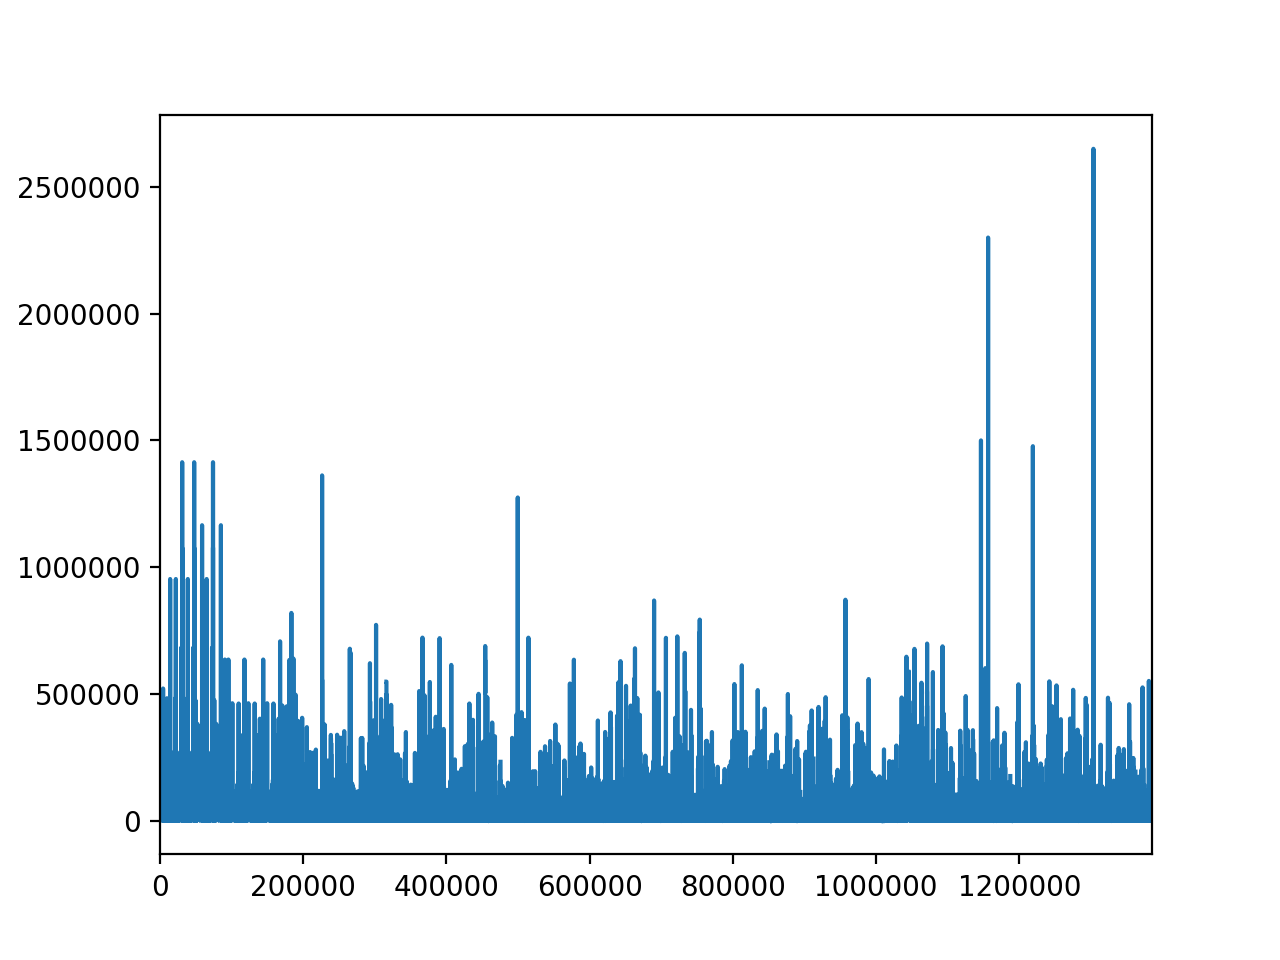

In [119]:
%matplotlib notebook


df['price_per_sq_m'].plot()

<IPython.core.display.Javascript object>


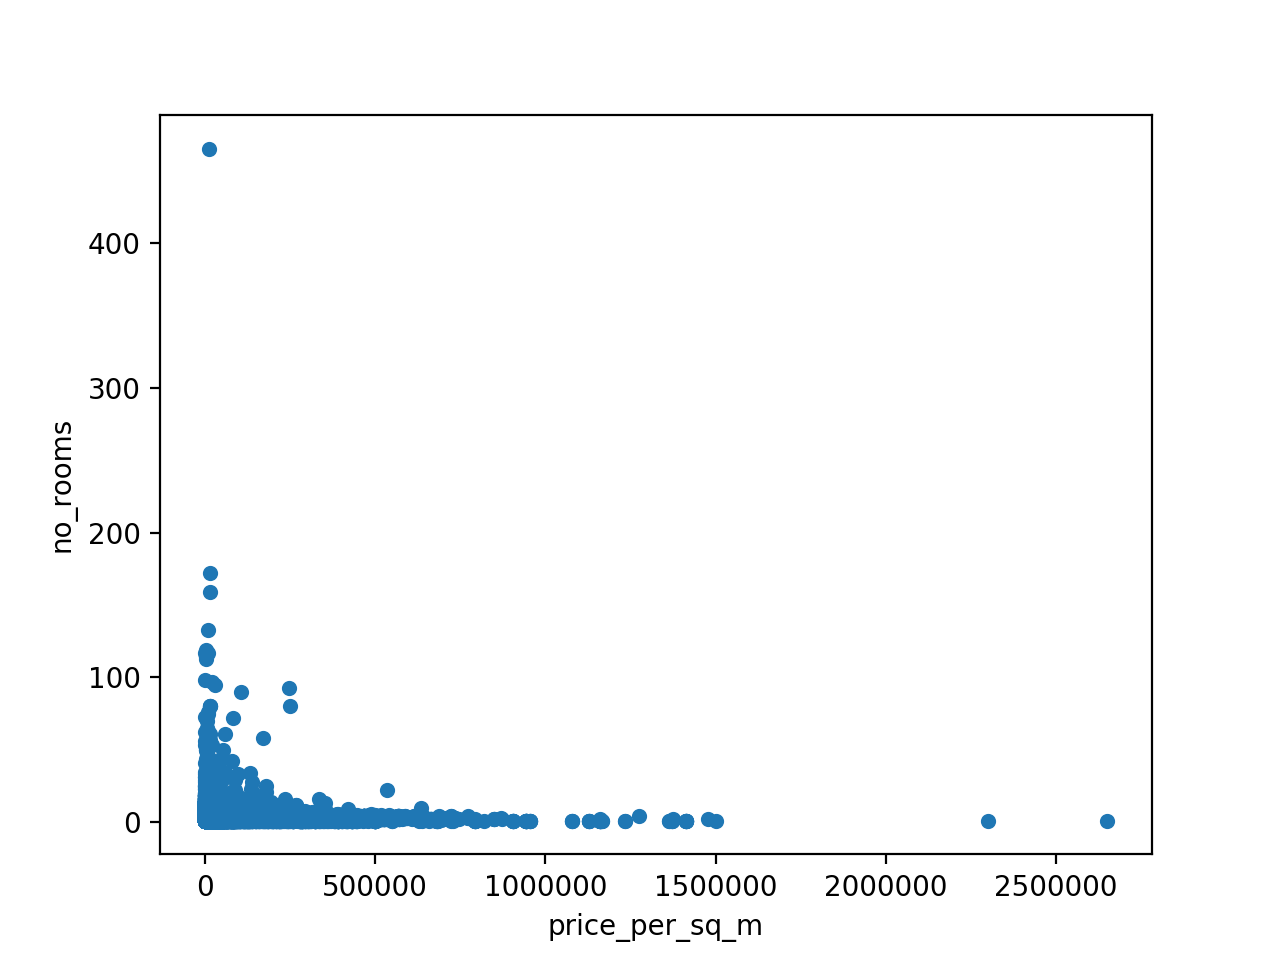

In [120]:
%matplotlib notebook


cols = ['no_rooms', 'price_per_sq_m']
df[cols].plot(kind='scatter', 
              x='price_per_sq_m',
              y='no_rooms')

# Selection of Data in a `DataFrame`

## Selection by Column Name


In [121]:
df['address']

0                    Ved Volden 5, 5. TV
1                     Rådhusstræde 4C, 1
2              Store Kongensgade 112A, 3
3                      Amaliegade 13G, 2
4                  Borgergade 144, 3. TH
5                 Nørre Søgade 9A, 1. TH
6                     Wildersgade 22, ST
7                     Toldbodgade 10A, 1
8           Andreas Bjørns Gade 4, 3. TH
9                     Sølvgade 15, 4. TH
10                     Linnésgade 16A, 1
11          Store Kongensgade 63A, ST. 4
12           Peder Skrams Gade 28, 2. TV
13                Brobergsgade 14, 1. TV
14                    Sølvgade 13, 2. TV
15                  Ny Adelgade 9, 2. TH
16               Lavendelstræde 9, 2. TV
17                       Åbenrå 10, 2. 5
18                  Grønnegade 31, 3. TV
19                   Badstuestræde 16, 2
20                  Nørre Voldgade 70, 4
21               Fredericiagade 25, 5. 1
22                    Sølvgade 19, 2. MF
23         David Balfours Gade 3, ST. TV
24              

The upper line is equivalent with using the column name in dot notation. 

In [122]:
df.address

0                    Ved Volden 5, 5. TV
1                     Rådhusstræde 4C, 1
2              Store Kongensgade 112A, 3
3                      Amaliegade 13G, 2
4                  Borgergade 144, 3. TH
5                 Nørre Søgade 9A, 1. TH
6                     Wildersgade 22, ST
7                     Toldbodgade 10A, 1
8           Andreas Bjørns Gade 4, 3. TH
9                     Sølvgade 15, 4. TH
10                     Linnésgade 16A, 1
11          Store Kongensgade 63A, ST. 4
12           Peder Skrams Gade 28, 2. TV
13                Brobergsgade 14, 1. TV
14                    Sølvgade 13, 2. TV
15                  Ny Adelgade 9, 2. TH
16               Lavendelstræde 9, 2. TV
17                       Åbenrå 10, 2. 5
18                  Grønnegade 31, 3. TV
19                   Badstuestræde 16, 2
20                  Nørre Voldgade 70, 4
21               Fredericiagade 25, 5. 1
22                    Sølvgade 19, 2. MF
23         David Balfours Gade 3, ST. TV
24              

You can select a subset of columns, by passing their names in a collection. 

In [123]:
df[['address', 'zip_code', 'no_rooms']].head()

,address,zip_code,no_rooms
0,"Ved Volden 5, 5. TV",1425 København K,3.0
1,"Rådhusstræde 4C, 1",1466 København K,3.0
2,"Store Kongensgade 112A, 3",1264 København K,2.0
3,"Amaliegade 13G, 2",1256 København K,3.0
4,"Borgergade 144, 3. TH",1300 København K,3.0


## Selection by Indexes

In the following we index the third row directly.

In [124]:
df.iloc[3]

address                 Amaliegade 13G, 2
zip_code                 1256 København K
price                             7375000
sell_date                      15-05-2017
sell_type                       Alm. Salg
price_per_sq_m                      75255
no_rooms                                3
housing_type                    Lejlighed
size_in_sq_m                           98
year_of_construction                 1948
price_change_in_pct                     9
Name: 3, dtype: object

You can use fancy-indexing too:

In [125]:
df.iloc[3:5]

,address,zip_code,price,sell_date,sell_type,price_per_sq_m,no_rooms,housing_type,size_in_sq_m,year_of_construction,price_change_in_pct
3,"Amaliegade 13G, 2",1256 København K,7375000,15-05-2017,Alm. Salg,75255.0,3.0,Lejlighed,98.0,1948.0,9.0
4,"Borgergade 144, 3. TH",1300 København K,5825000,10-05-2017,Alm. Salg,57673.0,3.0,Lejlighed,101.0,1854.0,3.0


In [126]:
df.iloc[3:5, 4:-1:3]

,sell_type,housing_type
3,Alm. Salg,Lejlighed
4,Alm. Salg,Lejlighed


In case you want to refer to elements not by position as above but by their label-location you can use the `loc` method instead.

In [127]:
df.loc[3:5]

,address,zip_code,price,sell_date,sell_type,price_per_sq_m,no_rooms,housing_type,size_in_sq_m,year_of_construction,price_change_in_pct
3,"Amaliegade 13G, 2",1256 København K,7375000,15-05-2017,Alm. Salg,75255.0,3.0,Lejlighed,98.0,1948.0,9.0
4,"Borgergade 144, 3. TH",1300 København K,5825000,10-05-2017,Alm. Salg,57673.0,3.0,Lejlighed,101.0,1854.0,3.0
5,"Nørre Søgade 9A, 1. TH",1370 København K,1126250,10-05-2017,Fam. Salg,10525.0,3.0,Lejlighed,107.0,1882.0,0.0


# Boolean Indexing

You can use boolean arrays for indexing too. That is, you can use boolean expressions directly for indexing and you will receive all those elements for which the expression evaluates to `True`.

In the following we assign `df_bolig_zealand` to `df` as the latter is shorter and makes the programs more readable.

In [128]:
df[df['zip_code'] == '2200 København N']

,address,zip_code,price,sell_date,sell_type,price_per_sq_m,no_rooms,housing_type,size_in_sq_m,year_of_construction,price_change_in_pct
87618,"Schleppegrellsgade 10, ST. TV",2200 København N,4395000,24-05-2017,Alm. Salg,47771.0,4.0,Lejlighed,92.0,1892.0,0.0
87619,"Blågårdsgade 26, 3. 23",2200 København N,1160000,23-05-2017,Fam. Salg,19661.0,1.0,Lejlighed,59.0,1972.0,0.0
87620,"Sortedam Dossering 41D, 4. TV",2200 København N,2000000,22-05-2017,Fam. Salg,33333.0,2.0,Lejlighed,60.0,1963.0,0.0
87621,"Gormsgade 6, 1. 6",2200 København N,1357000,19-05-2017,Fam. Salg,15779.0,3.0,Lejlighed,86.0,1965.0,0.0
87622,"Egegade 10, 5. TV",2200 København N,1318000,17-05-2017,Fam. Salg,25346.0,2.0,Lejlighed,52.0,1893.0,0.0
87623,"Rådmandsgade 40B, 4. TH",2200 København N,1825000,17-05-2017,Alm. Salg,33796.0,2.0,Lejlighed,54.0,1899.0,-4.0
87624,"Bjelkes Allé 37, 1",2200 København N,2380000,09-05-2017,Alm. Salg,14512.0,6.0,Lejlighed,164.0,1884.0,0.0
87625,"Sandbjerggade 54, 2. TH",2200 København N,1725000,07-05-2017,Alm. Salg,39204.0,2.0,Lejlighed,44.0,1935.0,-7.0
87626,"Rådmandsgade 40C, 1. 83",2200 København N,561000,05-05-2017,Fam. Salg,12750.0,1.0,Lejlighed,44.0,1967.0,0.0
87627,"Poppelgade 1, 1. TH",2200 København N,1860000,04-05-2017,Alm. Salg,41333.0,2.0,Lejlighed,45.0,1886.0,-7.0


In [129]:
df[(df['zip_code'] == '2100 København Ø') | 
   (df['zip_code'] == '2200 København N')]

,address,zip_code,price,sell_date,sell_type,price_per_sq_m,no_rooms,housing_type,size_in_sq_m,year_of_construction,price_change_in_pct
51353,"Petersborgvej 6, 3. 3",2100 København Ø,2600000,22-05-2017,Alm. Salg,41269.0,2.0,Lejlighed,63.0,1976.0,-2.0
51354,"Marstalsgade 49, 5. TH",2100 København Ø,1675000,18-05-2017,Fam. Salg,30454.0,2.0,Lejlighed,55.0,1904.0,0.0
51355,"Præstøgade 16, ST. TV",2100 København Ø,1845000,16-05-2017,Alm. Salg,31271.0,3.0,Lejlighed,59.0,1899.0,0.0
51356,"Rosenvængets Allé 36, ST. TH",2100 København Ø,12450000,15-05-2017,Alm. Salg,73668.0,6.0,Lejlighed,169.0,2009.0,0.0
51357,"Nordborggade 11, 3. TV",2100 København Ø,5920000,15-05-2017,Alm. Salg,48130.0,4.0,Lejlighed,123.0,1894.0,0.0
51358,"Nordre Frihavnsgade 84, 5. TV",2100 København Ø,2400000,13-05-2017,Fam. Salg,23300.0,5.0,Lejlighed,103.0,1892.0,0.0
51359,"Venøgade 26, 1. TV",2100 København Ø,1900000,11-05-2017,Fam. Salg,20212.0,4.0,Lejlighed,94.0,2007.0,0.0
51360,"Gustav Adolfs Gade 10, 3. TV",2100 København Ø,6598000,11-05-2017,Alm. Salg,49984.0,4.0,Lejlighed,132.0,1904.0,0.0
51361,"Marstalsgade 31, 2. TV",2100 København Ø,2015000,11-05-2017,Fam. Salg,35982.0,2.0,Lejlighed,56.0,1903.0,0.0
51362,"Lyngbyvej 32C, 3. MF",2100 København Ø,1265000,08-05-2017,Fam. Salg,19765.0,1.0,Lejlighed,64.0,1972.0,0.0


To avoid long chains of or (`|`) connections, you might want to specify the "or'ed" values in a list and just ask if cell values are in this list.

In [130]:
df[df['zip_code'].isin(['2100 København Ø', 
                        '2200 København N', 
                        '2300 København S'])]

,address,zip_code,price,sell_date,sell_type,price_per_sq_m,no_rooms,housing_type,size_in_sq_m,year_of_construction,price_change_in_pct
51353,"Petersborgvej 6, 3. 3",2100 København Ø,2600000,22-05-2017,Alm. Salg,41269.0,2.0,Lejlighed,63.0,1976.0,-2.0
51354,"Marstalsgade 49, 5. TH",2100 København Ø,1675000,18-05-2017,Fam. Salg,30454.0,2.0,Lejlighed,55.0,1904.0,0.0
51355,"Præstøgade 16, ST. TV",2100 København Ø,1845000,16-05-2017,Alm. Salg,31271.0,3.0,Lejlighed,59.0,1899.0,0.0
51356,"Rosenvængets Allé 36, ST. TH",2100 København Ø,12450000,15-05-2017,Alm. Salg,73668.0,6.0,Lejlighed,169.0,2009.0,0.0
51357,"Nordborggade 11, 3. TV",2100 København Ø,5920000,15-05-2017,Alm. Salg,48130.0,4.0,Lejlighed,123.0,1894.0,0.0
51358,"Nordre Frihavnsgade 84, 5. TV",2100 København Ø,2400000,13-05-2017,Fam. Salg,23300.0,5.0,Lejlighed,103.0,1892.0,0.0
51359,"Venøgade 26, 1. TV",2100 København Ø,1900000,11-05-2017,Fam. Salg,20212.0,4.0,Lejlighed,94.0,2007.0,0.0
51360,"Gustav Adolfs Gade 10, 3. TV",2100 København Ø,6598000,11-05-2017,Alm. Salg,49984.0,4.0,Lejlighed,132.0,1904.0,0.0
51361,"Marstalsgade 31, 2. TV",2100 København Ø,2015000,11-05-2017,Fam. Salg,35982.0,2.0,Lejlighed,56.0,1903.0,0.0
51362,"Lyngbyvej 32C, 3. MF",2100 København Ø,1265000,08-05-2017,Fam. Salg,19765.0,1.0,Lejlighed,64.0,1972.0,0.0


To find rows, in which certain cells satisfy a certain criteria, you can construct conjunctions of respective boolean expressions.

In [131]:
df[(df['zip_code'] == '2100 København Ø') & (df['sell_year'] == 2001)]

KeyError: 'sell_year'

We would like to have a column with a `sell_year`, so we have to create one out of the existing data. For example as in the following.

In [134]:
df['sell_year'] = [int(el.split('-')[-1]) for el in df['sell_date'].values]

In [136]:
df[(df['zip_code'] == '2100 København Ø') & (df['sell_year'] == 2001)]

,address,zip_code,price,sell_date,sell_type,price_per_sq_m,no_rooms,housing_type,size_in_sq_m,year_of_construction,price_change_in_pct,sell_year
59482,"Østerbrogade 208, 4. TH",2100 København Ø,525000,29-12-2001,Alm. Salg,12804.0,1.0,Lejlighed,41.0,1938.0,0.0,2001
59483,Niels W. Gades Gade 41,2100 København Ø,2050000,27-12-2001,Alm. Salg,15073.0,6.0,Rækkehus,136.0,1892.0,0.0,2001
59484,"Hardangergade 2, 2",2100 København Ø,478125,22-12-2001,Fam. Salg,2656.0,6.0,Lejlighed,180.0,1900.0,0.0,2001
59485,"Østerbrogade 104, 1. TV",2100 København Ø,3275000,20-12-2001,Alm. Salg,12996.0,7.0,Lejlighed,252.0,1902.0,0.0,2001
59486,Olufsvej 21,2100 København Ø,3000000,20-12-2001,Alm. Salg,24000.0,5.0,Rækkehus,125.0,1877.0,0.0,2001
59487,"Holsteinsgade 58, ST. TV",2100 København Ø,1165000,19-12-2001,Alm. Salg,15533.0,2.0,Lejlighed,75.0,1903.0,0.0,2001
59488,"Classensgade 35, 2. TV",2100 København Ø,1595000,18-12-2001,Alm. Salg,18764.0,4.0,Lejlighed,85.0,1895.0,0.0,2001
59489,Teglstrupvej 33,2100 København Ø,2000000,17-12-2001,Fam. Salg,11627.0,5.0,Villa,172.0,1923.0,0.0,2001
59490,"Østerbrogade 129, 2. TH",2100 København Ø,2512542,12-12-2001,Alm. Salg,15509.0,6.0,Lejlighed,162.0,1929.0,0.0,2001
59491,H.C. Lumbyes Gade 51,2100 København Ø,1600000,11-12-2001,Alm. Salg,11188.0,6.0,Rækkehus,143.0,1902.0,0.0,2001


In [137]:
df[(df['zip_code'] == '2100 København Ø') & (~df['no_rooms'].isnull())]

,address,zip_code,price,sell_date,sell_type,price_per_sq_m,no_rooms,housing_type,size_in_sq_m,year_of_construction,price_change_in_pct,sell_year
51353,"Petersborgvej 6, 3. 3",2100 København Ø,2600000,22-05-2017,Alm. Salg,41269.0,2.0,Lejlighed,63.0,1976.0,-2.0,2017
51354,"Marstalsgade 49, 5. TH",2100 København Ø,1675000,18-05-2017,Fam. Salg,30454.0,2.0,Lejlighed,55.0,1904.0,0.0,2017
51355,"Præstøgade 16, ST. TV",2100 København Ø,1845000,16-05-2017,Alm. Salg,31271.0,3.0,Lejlighed,59.0,1899.0,0.0,2017
51356,"Rosenvængets Allé 36, ST. TH",2100 København Ø,12450000,15-05-2017,Alm. Salg,73668.0,6.0,Lejlighed,169.0,2009.0,0.0,2017
51357,"Nordborggade 11, 3. TV",2100 København Ø,5920000,15-05-2017,Alm. Salg,48130.0,4.0,Lejlighed,123.0,1894.0,0.0,2017
51358,"Nordre Frihavnsgade 84, 5. TV",2100 København Ø,2400000,13-05-2017,Fam. Salg,23300.0,5.0,Lejlighed,103.0,1892.0,0.0,2017
51359,"Venøgade 26, 1. TV",2100 København Ø,1900000,11-05-2017,Fam. Salg,20212.0,4.0,Lejlighed,94.0,2007.0,0.0,2017
51360,"Gustav Adolfs Gade 10, 3. TV",2100 København Ø,6598000,11-05-2017,Alm. Salg,49984.0,4.0,Lejlighed,132.0,1904.0,0.0,2017
51361,"Marstalsgade 31, 2. TV",2100 København Ø,2015000,11-05-2017,Fam. Salg,35982.0,2.0,Lejlighed,56.0,1903.0,0.0,2017
51362,"Lyngbyvej 32C, 3. MF",2100 København Ø,1265000,08-05-2017,Fam. Salg,19765.0,1.0,Lejlighed,64.0,1972.0,0.0,2017


# Preprocessing Data
 
At some point, you might want to work only on data that is complete, which you can do by filtering out all rows, which contain a null value in a certain field.

In [138]:
df_data = df[(~df['address'].isnull()) & (~df['zip_code'].isnull())]

## Geocoding with online APIs

For using geolocation services, we have to create addresses in a form that they 'understand'. Currently, we have addresses split in two columns `address` and `zip_code`, see below.


In [139]:
df_data.head()

,address,zip_code,price,sell_date,sell_type,price_per_sq_m,no_rooms,housing_type,size_in_sq_m,year_of_construction,price_change_in_pct,sell_year
0,"Ved Volden 5, 5. TV",1425 København K,4000000,23-05-2017,Alm. Salg,43956.0,3.0,Lejlighed,91.0,1938.0,0.0,2017
1,"Rådhusstræde 4C, 1",1466 København K,4895000,18-05-2017,Alm. Salg,46619.0,3.0,Lejlighed,105.0,1796.0,0.0,2017
2,"Store Kongensgade 112A, 3",1264 København K,250000,15-05-2017,Andet,1851.0,2.0,Lejlighed,135.0,1860.0,0.0,2017
3,"Amaliegade 13G, 2",1256 København K,7375000,15-05-2017,Alm. Salg,75255.0,3.0,Lejlighed,98.0,1948.0,9.0,2017
4,"Borgergade 144, 3. TH",1300 København K,5825000,10-05-2017,Alm. Salg,57673.0,3.0,Lejlighed,101.0,1854.0,3.0,2017


We want to create an address, which does not contain the floor of a flat anymore. That is, we will create addresses of the form `Lille Strandstræde 20 1254 København K` for all addresses.

We can do that with a list comprehension as illustrated in the following. Note, that we are splitting up the string on the comma and only retain the part of the address refering to the door of the building.

In [140]:
api_addresses = [' '.join([a.split(',')[0], z]) for a, z in df[['address', 'zip_code']].values]

Note, since we remove data from the addresses, we may now have duplicates in our `api_addresses` dataset. For example, `Schleppegrellsgade 5, 4. TH` has the same address on the door as `Schleppegrellsgade 5, 3. TH`. That is important to remember, to reduce the amount of data that you push to an API.

In [141]:
print(len(set(api_addresses)))
print(len(api_addresses))

1142528
1385309


Alternatively, we could use a regular expression to filter for the value of the address. That 


In the following function, we use the Google Maps Geolocation API (https://developers.google.com/maps/documentation/geolocation/intro) to receive locations in form of latitude and longitude values.

In [142]:
import requests


def get_location_for(address='Copenhagen'):
    api_url = 'https://maps.googleapis.com/maps/api/geocode/json'
    
    try:
        r = requests.get(api_url, params={'sensor': 'false', 
                                          'address': address})
        results = r.json()['results']
    
        location = results[0]['geometry']['location']
        lat, lon = location['lat'], location['lng']
    except:
        lat, lon = None, None
    return lat, lon

For this example we reduce the amount of data with which we query the API even more, since we do not have a lot of time in class.

In [143]:
df = df_data

df_cphn_2000 = df[(df['zip_code'] == '2200 København N') & 
                  (df['sell_year'] == 2000)]

complete_addresses = [' '.join([a.split(',')[0], z]) 
                      for a, z in df_cphn_2000[['address', 'zip_code']].values]
# This line is the equivalent of the older
df_cphn_2000 = df_cphn_2000.assign(complete_addresses=complete_addresses)
# df_cphn_2000.loc[:, 'complete_addresses'] = complete_addresses
# df_cphn_2000['complete_addresses'] = complete_addresses, which will produce a warning

df_cphn_2000.head()

,address,zip_code,price,sell_date,sell_type,price_per_sq_m,no_rooms,housing_type,size_in_sq_m,year_of_construction,price_change_in_pct,sell_year,complete_addresses
92100,"Dagmarsgade 19, 4. 519",2200 København N,719998,17-12-2000,Alm. Salg,11612.0,2.0,Lejlighed,62.0,1974.0,0.0,2000,Dagmarsgade 19 2200 København N
92101,"Hamletsgade 8, 1. 82",2200 København N,744960,05-12-2000,Alm. Salg,11460.0,2.0,Lejlighed,65.0,1975.0,0.0,2000,Hamletsgade 8 2200 København N
92102,"Meinungsgade 42, 5. TH",2200 København N,799914,20-11-2000,Alm. Salg,18179.0,2.0,Lejlighed,44.0,1881.0,0.0,2000,Meinungsgade 42 2200 København N
92103,"Hamletsgade 17, 5. TV",2200 København N,732757,09-11-2000,Alm. Salg,12855.0,2.0,Lejlighed,57.0,1947.0,0.0,2000,Hamletsgade 17 2200 København N
92104,"Schleppegrellsgade 5, 4. TH",2200 København N,353979,07-11-2000,Alm. Salg,3806.0,3.0,Lejlighed,93.0,1892.0,0.0,2000,Schleppegrellsgade 5 2200 København N


In [144]:
print(len(df_cphn_2000['complete_addresses']))
print(len(df_cphn_2000['complete_addresses'].unique()))

292
67


In [109]:
to_code_addresses = df_cphn_2000['complete_addresses'].unique()
locations = [get_location_for(a) for a in to_code_addresses]
locations

[(55.698437, 12.545799),
 (55.70222829999999, 12.5462645),
 (55.6929436, 12.5555572),
 (55.7011148, 12.5447834),
 (55.689802, 12.564516),
 (55.6850556, 12.555061),
 (55.6920052, 12.554414),
 (55.6918623, 12.5675306),
 (55.7011028, 12.5431532),
 (55.69610909999999, 12.5457271),
 (55.6875838, 12.5438127),
 (55.698789, 12.5445608),
 (55.697512, 12.539522),
 (55.70127280000001, 12.5443325),
 (55.7019339, 12.5498554),
 (55.6984672, 12.5450803),
 (55.700458, 12.540569),
 (55.6976804, 12.5460551),
 (55.688908, 12.564339),
 (55.696987, 12.5406452),
 (55.6967229, 12.5405979),
 (55.7005864, 12.5467889),
 (55.6920808, 12.5566294),
 (55.69681809999999, 12.5399321),
 (55.69797800000001, 12.55047),
 (55.695648, 12.5456097),
 (55.69255459999999, 12.5464326),
 (55.690859, 12.5594467),
 (55.6918327, 12.5676656),
 (55.687803, 12.553145),
 (55.68909189999999, 12.5628596),
 (55.693515, 12.546714),
 (55.7011258, 12.5443972),
 (55.7029447, 12.5487313),
 (55.7027569, 12.5455956),
 (55.698449, 12.546294),
 (5

As you can see, the list comprehension takes a while to complete, i.e., some minutes. Even though, the amount of data we push to the API is quite low.

Using a paid plan, we could query more than 2000 addresses, see https://developers.google.com/maps/documentation/geolocation/get-api-key.

However, as we have already 103,396 unique addresses for the housing sales records only on Zealand and only within the years 2000 to 2005, see `df_bolig_zealand` geocoding of those addresses would take ca. 35 minutes (`103396 / 50 / 60`). Furthermore, it would cost us ca. 50USD (`(103396 - 2500) / 1000 * 0.5`), see 'Standard Usage Limits' at https://developers.google.com/maps/documentation/geolocation/usage-limits

Consequently, for bulk processing the Google API may not be the right choice for your use case.

In [145]:
lats, lons = zip(*locations)

geocoded = pd.DataFrame({'complete_addresses': to_code_addresses,
                         'lat': lats,
                         'lon': lons})
geocoded.head()

,complete_addresses,lat,lon
0,Dagmarsgade 19 2200 København N,55.698437,12.545799
1,Hamletsgade 8 2200 København N,55.702228,12.546264
2,Meinungsgade 42 2200 København N,55.692944,12.555557
3,Hamletsgade 17 2200 København N,55.701115,12.544783
4,Schleppegrellsgade 5 2200 København N,55.689802,12.564516


Now, it remains to merge the geolocation values from the `geocoded` `DataFrame` into the main `df``DataFrame`. The straight forward method would be to iterate over each row and add the corresponding value. However, this is not efficient. Thus, read the documentation at http://pandas.pydata.org/pandas-docs/stable/merging.html and suggest a more efficient way of merging the locations into `df`.

## Geocoding with OSM API

#### GeoPy Documentation

If not targetting a geocoding API directly as in the example above, you can use a wrapper, which allows you to target various different APIs from different providers. One such wrapper is the `geopy` module, see http://geopy.readthedocs.io/en/latest/. It has to be installed to your environment, for example, via `pip install geopy`.

In the following example we will use the Openstreetmap API with the help of `geopy`.

In [148]:
from tqdm import tqdm
# The Nominatim geocoder seems to use openstreetmap.com...
from geopy.geocoders import Nominatim


def get_locations(address, zip_code):
    try:
        # This removes information about a flats storey
        address_field = address.split(', ')[0]
        # This one removes trailing letters on the city name
        # It seems as if Openstreetmap cannot handle København H
        # but it works with København
        zip_field = ' '.join(zip_code.split(' ')[:-1])
        search_address = ', '.join([address_field, zip_field])

        geolocator = Nominatim()
        location = geolocator.geocode(search_address)
        return location.latitude, location.longitude
    except:
        print('Skipped geocoding of {} {}'.format(address, zip_code))
        return None, None


address = 'Åboulevard 34E, 4. TH'
zip_code = '2200 København N'
get_locations(address, zip_code)

(55.685043, 12.555086)

In [150]:
mini_df = df[['address', 'zip_code']][:15]

locs = []
for _, el in df_bolig_zealand[['address', 'zip_code']][:15].iterrows():
    locs.append(get_locations(el['address'], el['zip_code']))
locs

Skipped geocoding of Amaliegade 13B, 6. TH 1256 København K


[(55.68121, 12.590218),
 (55.671201, 12.587217),
 (55.671854, 12.585575),
 (55.6858749, 12.5894455),
 (None, None),
 (55.680771, 12.589998),
 (55.672052, 12.594456),
 (55.681538, 12.582607),
 (55.67167, 12.587249),
 (55.687122, 12.588841),
 (55.684351, 12.56783),
 (55.670923, 12.587419),
 (55.678077, 12.575404),
 (55.675441, 12.598289),
 (55.676045, 12.598423)]

Now, our  geocoding strategy was less smart. We query addresses again and again as we do not build a set of complete addresses refering to locations of doors. However, the advantage is, that we can `join` the result of the above operation directly to our current `DataFrame`.

In [151]:
mini_df.join(pd.DataFrame(locs, columns=['lat', 'lon']))

,address,zip_code,lat,lon
0,"Ved Volden 5, 5. TV",1425 København K,55.681210,12.590218
1,"Rådhusstræde 4C, 1",1466 København K,55.671201,12.587217
2,"Store Kongensgade 112A, 3",1264 København K,55.671854,12.585575
3,"Amaliegade 13G, 2",1256 København K,55.685875,12.589446
4,"Borgergade 144, 3. TH",1300 København K,NaN,NaN
5,"Nørre Søgade 9A, 1. TH",1370 København K,55.680771,12.589998
6,"Wildersgade 22, ST",1408 København K,55.672052,12.594456
7,"Toldbodgade 10A, 1",1253 København K,55.681538,12.582607
8,"Andreas Bjørns Gade 4, 3. TH",1428 København K,55.671670,12.587249
9,"Sølvgade 15, 4. TH",1307 København K,55.687122,12.588841


As you can see, geocoding is not really faster as before and there might exist similar restrictions as earlier depending, which precise API you use as a backend. So we have a look at even another way of geocoding our data.


## Geocoding with OSM file

Since we figured that online APIs may not be appropriate for geocoding such a large amount of addresses as we have -at least not for free and within a reasonable amount of time- we search a bit on the web and find http://download.geofabrik.de, which provides an offline dump of the Openstreetmaps data.

We can download a file with data corresponding to Danmark as in the following.

In [ ]:
%%bash

wget --directory-prefix=./data/ http://download.geofabrik.de/europe/denmark-latest.osm.bz2
bzip2 -d ./data/denmark-latest.osm.bz2

In [152]:
%%bash

ls -ltrh ./data/denmark-latest.osm

-rw-r--r-- 1 vagrant vagrant 4.9G Sep 12 05:51 ./data/denmark-latest.osm


In [153]:
%%bash

head ./data/denmark-latest.osm

<?xml version='1.0' encoding='UTF-8'?>
<osm version="0.6" generator="osmconvert 0.8.5" timestamp="2017-09-11T20:43:02Z">
	<bounds minlat="54.44065" minlon="7.7011" maxlat="58.06239" maxlon="15.65449"/>
	<node id="115722" lat="55.7332789" lon="9.1270597" version="3" timestamp="2016-01-12T10:36:08Z" changeset="36525373" uid="207581" user="Hjart"/>
	<node id="115723" lat="55.7332556" lon="9.1268908" version="3" timestamp="2016-01-12T10:36:08Z" changeset="36525373" uid="207581" user="Hjart"/>
	<node id="115724" lat="55.7336882" lon="9.1266877" version="6" timestamp="2013-06-21T08:36:40Z" changeset="16640465" uid="207581" user="Hjart"/>
	<node id="115727" lat="55.7345219" lon="9.1302165" version="6" timestamp="2014-11-03T18:16:00Z" changeset="26531953" uid="207581" user="Hjart"/>
	<node id="115728" lat="55.734561" lon="9.1309176" version="7" timestamp="2017-03-22T15:17:28Z" changeset="47071321" uid="366321" user="Peter Bremer"/>
	<node id="115729" lat="55.7343871" lon="9.1319505" version="6

By inspecting the file, we see that the data is stored in XML format. We could either set out to parse the XML file with standard modules. However, on the web we find that the following two modules implement a high-level parser for the OSM data.

  * The `imposm.parser` https://imposm.org/docs/imposm.parser/latest/ is said to be efficient and quick, but
  * `osmread` https://github.com/dezhin/osmread is really simple to use, so we go for that one here.

In `osmread` documentation (https://github.com/dezhin/osmread#example-usage), you find, that you can read and process the geo-data like this:

```python
from osmread import parse_file, Way

highway_count = 0
for entity in parse_file('foo.osm.bz2'):
    if isinstance(entity, Way) and 'highway' in entity.tags:
        highway_count += 1

print("%d highways found" % highway_count)
```

We can go ahead and adapt the example from the documentation to fill a dictionary with the geo-locations of each address, which we can use as strings.

In [154]:
from osmread import parse_file, Node
from collections import defaultdict


postcodes = defaultdict(lambda: defaultdict(dict))

for entry in parse_file('./data/denmark-latest.osm'):
    if (isinstance(entry, Node) and 
        'addr:street' in entry.tags and 
        'addr:postcode' in entry.tags and 
        'addr:housenumber' in entry.tags):
        postcodes[entry.tags['addr:postcode']][entry.tags['addr:street']][entry.tags['addr:housenumber']] = entry.lon, entry.lat


KeyboardInterrupt: 

However, the drawback with this solution is, that our initial OSM dataset for Danmark is 4.9GB large. That is, the dictionary, which we construct will likely fill more than a gigabyte of RAM. To implement memory friendly programs, you might want to resort to _generator functions_, see below.

In [155]:
from osmread import parse_file, Node


def decode_node_to_csv():
    for entry in parse_file('./data/denmark-latest.osm'):
        if (isinstance(entry, Node) and 
            'addr:street' in entry.tags and 
            'addr:postcode' in entry.tags and 
            'addr:housenumber' in entry.tags):

            yield entry


for idx, decoded_node in enumerate(decode_node_to_csv()):
    if idx > 100:
        break
    print(idx, decoded_node)
    
    

0 Node(id=814331, version=4, changeset=6758289, timestamp=1293238072, uid=1124, tags={'name': 'Statoil H C Ørstedvej', 'source': 'www.statoil.dk, with permission', 'amenity': 'fuel', 'operator': 'Statoil', 'addr:city': 'Frederiksberg', 'addr:street': 'H.C. Ørsteds Vej', 'addr:postcode': '1879', 'addr:housenumber': '25'}, lon=12.54731, lat=55.67912)
1 Node(id=24958713, version=7, changeset=34722010, timestamp=1445208795, uid=1288, tags={'name': 'Ølbaren', 'phone': '+45 35354534', 'amenity': 'pub', 'smoking': 'no', 'website': 'http://oelbaren.dk/', 'addr:city': 'København N', 'addr:street': 'Elmegade', 'addr:postcode': '2200', 'opening_hours': 'Mo 21:00-01:00, Tu-We 16:00-01:00, Th 16:00-02:00, Fr 15:00-02:00, Sa 13:00-02:00, Su 13:00-23:00', 'addr:housenumber': '2'}, lon=12.5578332, lat=55.6892934)
2 Node(id=24959329, version=5, changeset=6599870, timestamp=1291930264, uid=10371, tags={'addr:city': 'København Ø', 'addr:street': 'Universitetsparken', 'addr:postcode': '2100', 'addr:housen

KeyboardInterrupt: 

# Hov, generators? `yield`?

Actually, this is a really popular question with really many answers, which are so highly rated on Stackoverflow that we will have a look on them.

https://stackoverflow.com/questions/231767/what-does-the-yield-keyword-do



# At last...

After all this intro to NumPy, Pandas, and data preprocessing lets have a look on how to combine different datasets and use our skills to gain insight in data on Copenhagen.

Lets say we want to know if there is a relation between the amount of youngsters -people between 18 an 35- in various neighbourhoods of Copenhagen and the average square meter price in these neighbourhoods in a certain year.

First, we get the code of each neighbourhood, which is used by Copenhagen komune.

In [159]:
import numpy as np


df_kbh = pd.read_csv('/tmp/befkbhalderstatkode.csv')
mask = (df_kbh.AAR == 2015) & (df_kbh.ALDER >= 18) & (df_kbh.ALDER <= 35)

city_code = np.unique(df_kbh[mask].BYDEL)

Then we compute out of the komune data the amount of youngsters in each neighbourhood by summing up their amounts accross the different ages.

In [160]:
youngsters = df_kbh[mask].groupby(['BYDEL']).ALDER.sum()
youngsters

BYDEL
1     22248
2     27814
3     30619
4     27883
5     24346
6     19502
7     25572
8     30648
9     26197
10    28714
99    12003
Name: ALDER, dtype: int64

Now, we combine all the data about Copenhagen komune's neighbourhoods and the amount of youngsters into a single `DataFrame`.

In [162]:
neighbourhood_names = ['Indre By', 'Østerbro', 'Nørrebro', 
                       'Vesterbro/Kgs. Enghave', 'Valby', 
                       'Vanløse', 'Brønshøj-Husum', 'Bispebjerg', 
                       'Amager Øst', 'Amager Vest', 'Udenfor']
zip_codes_low = [1000, 2100, 2200, 1500, 2500, 2720, 2700, 2400, 
                 2300, 2770, np.NaN]
zip_codes_high = [1499, 2100, 2200, 1799, 2500, 2720, 2700, 2400, 
                  2300, 2770, np.NaN]
df_kbh = pd.DataFrame({'city_code': city_code, 
                   'neighbourhood': neighbourhood_names, 
                   'zip_code_low': zip_codes_low, 
                   'zip_code_high': zip_codes_high}, 
                   columns=['city_code', 'neighbourhood', 
                            'zip_code_low', 'zip_code_high'],
                   index=city_code
                 )

df_kbh = df_kbh.join(pd.DataFrame(youngsters))
df_kbh.rename(columns={'ALDER': 'no_youngsters'}, inplace=True)
df_kbh

,city_code,neighbourhood,zip_code_low,zip_code_high,no_youngsters
1,1,Indre By,1000.0,1499.0,22248
2,2,Østerbro,2100.0,2100.0,27814
3,3,Nørrebro,2200.0,2200.0,30619
4,4,Vesterbro/Kgs. Enghave,1500.0,1799.0,27883
5,5,Valby,2500.0,2500.0,24346
6,6,Vanløse,2720.0,2720.0,19502
7,7,Brønshøj-Husum,2700.0,2700.0,25572
8,8,Bispebjerg,2400.0,2400.0,30648
9,9,Amager Øst,2300.0,2300.0,26197
10,10,Amager Vest,2770.0,2770.0,28714


In [163]:
df.head()

,address,zip_code,price,sell_date,sell_type,price_per_sq_m,no_rooms,housing_type,size_in_sq_m,year_of_construction,price_change_in_pct,sell_year
0,"Ved Volden 5, 5. TV",1425 København K,4000000,23-05-2017,Alm. Salg,43956.0,3.0,Lejlighed,91.0,1938.0,0.0,2017
1,"Rådhusstræde 4C, 1",1466 København K,4895000,18-05-2017,Alm. Salg,46619.0,3.0,Lejlighed,105.0,1796.0,0.0,2017
2,"Store Kongensgade 112A, 3",1264 København K,250000,15-05-2017,Andet,1851.0,2.0,Lejlighed,135.0,1860.0,0.0,2017
3,"Amaliegade 13G, 2",1256 København K,7375000,15-05-2017,Alm. Salg,75255.0,3.0,Lejlighed,98.0,1948.0,9.0,2017
4,"Borgergade 144, 3. TH",1300 København K,5825000,10-05-2017,Alm. Salg,57673.0,3.0,Lejlighed,101.0,1854.0,3.0,2017


In [167]:
df['zip_nr'] = [int(el.split(' ')[0]) for el in df['zip_code'].values]

In [169]:
df.head()

,address,zip_code,price,sell_date,sell_type,price_per_sq_m,no_rooms,housing_type,size_in_sq_m,year_of_construction,price_change_in_pct,sell_year,zip_nr
0,"Ved Volden 5, 5. TV",1425 København K,4000000,23-05-2017,Alm. Salg,43956.0,3.0,Lejlighed,91.0,1938.0,0.0,2017,1425
1,"Rådhusstræde 4C, 1",1466 København K,4895000,18-05-2017,Alm. Salg,46619.0,3.0,Lejlighed,105.0,1796.0,0.0,2017,1466
2,"Store Kongensgade 112A, 3",1264 København K,250000,15-05-2017,Andet,1851.0,2.0,Lejlighed,135.0,1860.0,0.0,2017,1264
3,"Amaliegade 13G, 2",1256 København K,7375000,15-05-2017,Alm. Salg,75255.0,3.0,Lejlighed,98.0,1948.0,9.0,2017,1256
4,"Borgergade 144, 3. TH",1300 København K,5825000,10-05-2017,Alm. Salg,57673.0,3.0,Lejlighed,101.0,1854.0,3.0,2017,1300


And now, we compute a list of the average price per square meter per neighbourhood.

In [170]:
mean_sqm_prices = []

for _, el in df_kbh[~df_kbh.zip_code_low.isnull()].iterrows():
    mask = ((df.zip_nr >= el.zip_code_low) & 
            (df.zip_nr <= el.zip_code_high))
    mean_sqm_prices.append(df[mask].price_per_sq_m.mean())
    
mean_sqm_prices

[32411.519463737684,
 27814.266051195973,
 25167.08723879083,
 28624.324043715846,
 22371.630665046014,
 20954.648322422257,
 19931.858544911458,
 22429.3771264067,
 24862.90452232246,
 17908.6389931207]

<IPython.core.display.Javascript object>


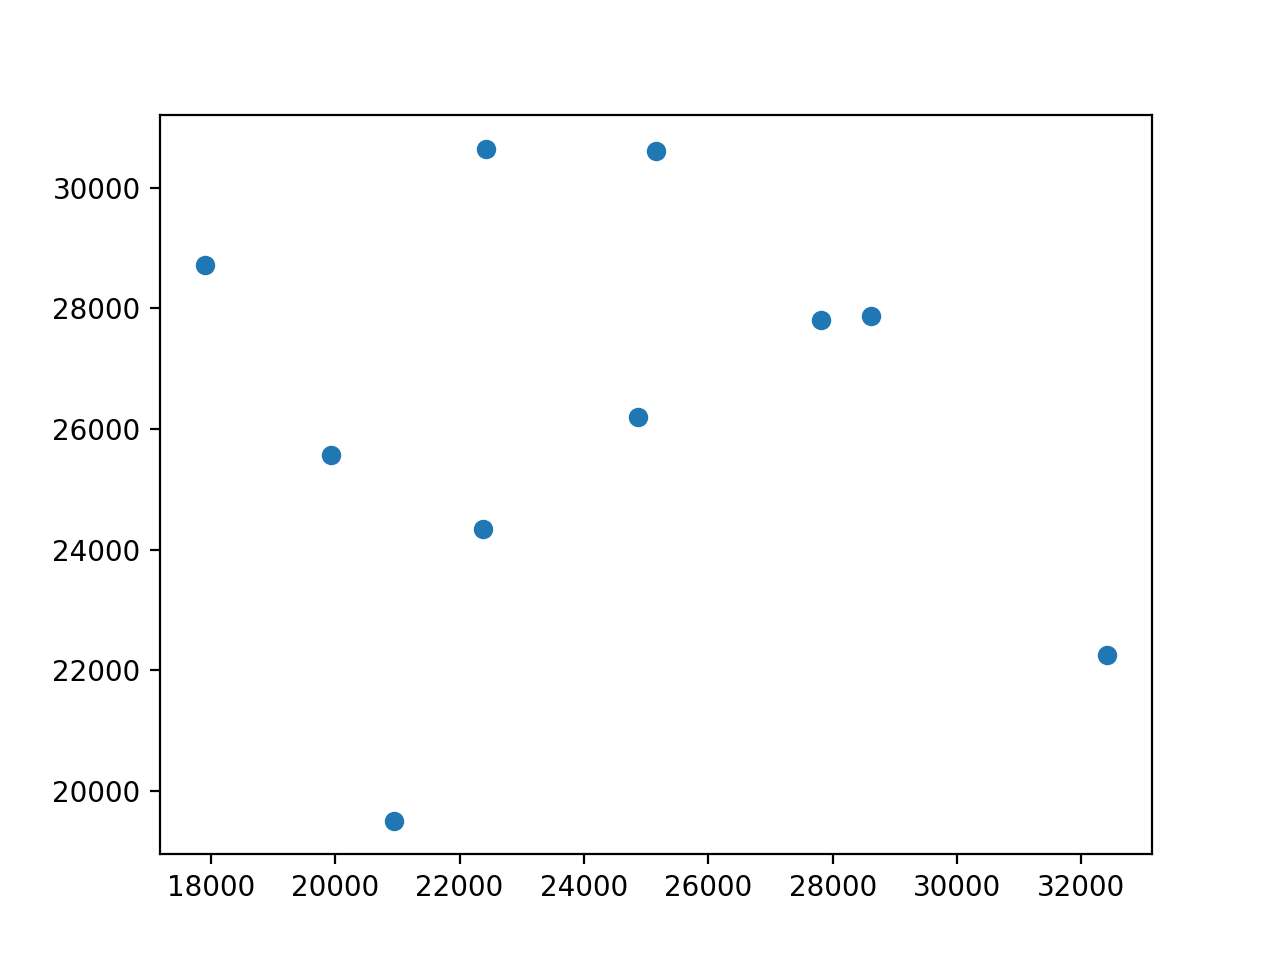

In [172]:
%matplotlib notebook


import matplotlib.pyplot as plt


plt.scatter(mean_sqm_prices, youngsters.values[:-1])

That looks already quite unrelated, no? Just to be sure we compute the Pearson number (https://en.wikipedia.org/wiki/Pearson_correlation_coefficient). Jens will tell you a lot more about it. However, it tells us to which degree and with which likelyhood our two features are correlated.

In [173]:
from scipy.stats import pearsonr


pearsonr(mean_sqm_prices, youngsters.values[:-1])

(-0.07623037404194892, 0.83421170166073244)

# Further Links:

  * https://www.datacamp.com/community/tutorials/pandas-tutorial-dataframe-python